# Ford GoBike System Data
## by Urmil Tamboli

## Introduction

> - This dataset includes information about individual rides made in a bike-sharing system covering the greater San Fransisco Bay area.
- The source of this data can be found at the following website: https://s3.amazonaws.com/baywheels-data/index.html
- I'll be downloading for the year 2017-2018 and merging them into a single dataset so analysis can be done.

### The following are the elements of the dataset:

- Member Year of Birth
- Member Gender
- User Type
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude


## Table of Content
- <a href='#univariate_exploration'>Univariate Exploration</a>

- <a href='#bivariate_exploration'>Bivariate Exploration</a>

- <a href='#multivariate_exploration'>Multivariate Exploration</a>


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
from requests import get
from datetime import datetime

%matplotlib inline

In [3]:
folder_csv = 'trip_data_files'

In [4]:
makedirs(folder_csv)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_csv))

for month in range(1,13):
    month_string = str(month)
    month_with_zero = month_string.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_with_zero + '-fordgobike-tripdata.csv.zip'
    response = get(data_url)

        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzip_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzip_file.extractall(folder_csv)
    
for month in range(1,5):
    month_string = str(month)
    month_with_zero = month_string.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_with_zero + '-fordgobike-tripdata.csv.zip'
    response = get(data_url)
    
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzip_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzip_file.extractall(folder_csv)

for month in range(5,13):
    month_string = str(month)
    month_with_zero = month_string.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_with_zero + '-baywheels-tripdata.csv.zip'
    response = get(data_url)
    
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzip_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzip_file.extractall(folder_csv)

    
for month in range(1,6):
    month_string = str(month)
    month_with_zero = month_string.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/baywheels-data/2020' + month_with_zero + '-baywheels-tripdata.csv.zip'
    response = get(data_url)
    
#     code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzip_file = ZipFile(BytesIO(response.content))
        
#     puts extracted zip file into folder trip_data_files

    unzip_file.extractall(folder_csv)

In [5]:
# all_csv = []
# for name in listdir(folder_csv):
#     all_csv.append(pd.read_csv(folder_csv+'/'+name))
    
# df = pd.concat(all_csv)

In [6]:
# df.to_csv('merged_data.csv')

In [7]:
#read the csv file
df = pd.read_csv('merged_data.csv')

C:\Users\91976\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#shows first 5 rows
df.head()

,Unnamed: 0,Unnamed: 0.1,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,0.0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,1,1.0,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,2,2.0,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,3,3.0,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,4,4.0,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [9]:
#shows info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   Unnamed: 0.1             float64
 2   duration_sec             int64  
 3   start_time               object 
 4   end_time                 object 
 5   start_station_id         float64
 6   start_station_name       object 
 7   start_station_latitude   float64
 8   start_station_longitude  float64
 9   end_station_id           float64
 10  end_station_name         object 
 11  end_station_latitude     float64
 12  end_station_longitude    float64
 13  bike_id                  int64  
 14  user_type                object 
 15  member_birth_year        float64
 16  member_gender            object 
 17  bike_share_for_all_trip  object 
dtypes: float64(8), int64(3), object(7)
memory usage: 327.3+ MB


In [10]:
#stats about thr data
df.describe()

,Unnamed: 0,Unnamed: 0.1,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.383421e+06,519700.000000,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.383421e+06,2.206162e+06
mean,1.211889e+05,259849.500000,9.100063e+02,1.142750e+02,3.776784e+01,-1.223524e+02,1.124780e+02,3.776798e+01,-1.223518e+02,2.160719e+03,1.982537e+03
std,1.113442e+05,150024.611786,2.643865e+03,9.797252e+01,1.018623e-01,1.545178e-01,9.785323e+01,1.017500e-01,1.541098e-01,1.252545e+03,1.051346e+01
min,0.000000e+00,0.000000,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.881000e+03
25%,4.583500e+04,129924.750000,3.570000e+02,3.000000e+01,3.777106e+01,-1.224116e+02,2.900000e+01,3.777166e+01,-1.224094e+02,1.119000e+03,1.977000e+03
50%,9.167000e+04,259849.500000,5.640000e+02,8.100000e+01,3.778127e+01,-1.223974e+02,8.100000e+01,3.778175e+01,-1.223971e+02,2.173000e+03,1.985000e+03
75%,1.539990e+05,389774.250000,8.850000e+02,1.810000e+02,3.779539e+01,-1.222948e+02,1.800000e+02,3.779539e+01,-1.222948e+02,3.116000e+03,1.990000e+03
max,5.196990e+05,519699.000000,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [11]:
#number of rows and columns
df.shape[0],df.shape[1]

(2383421, 18)

### What is the structure of your dataset?

> After looking at the dataset, we can see that there are around 2.1million rows and 15 columns that represent the bike users and provide various information about the user like gender, trip duration, start & end station and type of user (Subscribed Member or Customer).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is gender, age group, duration, type of user will help me in my investigation.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the start and end date will play an important role in the investigation but it needs to be converted to datetime to use this feature for its full potential.

# Wrangling

### Assesment

In [12]:
#name of columns as list
list(df)

['Unnamed: 0',
 'Unnamed: 0.1',
 'duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [13]:
#sum of nulls in each columns
df.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1               1863721
duration_sec                     0
start_time                       0
end_time                         0
start_station_id             11771
start_station_name           11771
start_station_latitude           0
start_station_longitude          0
end_station_id               11771
end_station_name             11771
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
member_birth_year           177259
member_gender               176829
bike_share_for_all_trip     519700
dtype: int64

In [14]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   Unnamed: 0.1             float64
 2   duration_sec             int64  
 3   start_time               object 
 4   end_time                 object 
 5   start_station_id         float64
 6   start_station_name       object 
 7   start_station_latitude   float64
 8   start_station_longitude  float64
 9   end_station_id           float64
 10  end_station_name         object 
 11  end_station_latitude     float64
 12  end_station_longitude    float64
 13  bike_id                  int64  
 14  user_type                object 
 15  member_birth_year        float64
 16  member_gender            object 
 17  bike_share_for_all_trip  object 
dtypes: float64(8), int64(3), object(7)
memory usage: 327.3+ MB


## Cleaning

**Aim:** To remove unwanted first and second column which are of no use.

**Code**

In [15]:
#drop unwaned 1st and 2nd columns
drop_col = df.columns[0:2]
df.drop(columns=drop_col, axis =1, inplace=True)

**Test**

In [16]:
#list columns of dataframe
list(df)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

**Aim:** To remove null values from the dataframe in member_gender, start_station_id and member_birth. (Removing start_station_id will remove corresponding null values from end_station_id)

**Code**

In [17]:
#creates dataframe without null values
df = df[df.member_gender.notnull()]
df = df[df.start_station_id.notnull()]
df = df[df.member_birth_year.notnull()]

**Test**

In [18]:
#sum of nulls in all columns
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year               0
member_gender                   0
bike_share_for_all_trip    453159
dtype: int64

**Aim:** To create a new column names user_age which will contain the age of users 

**Code**

In [19]:
#create age bins
df['user_age'] = datetime.now().year -df['member_birth_year']

**Test**

In [20]:
#first five rows of user_age column
df.user_age.head()

0     33.0
1     55.0
4     23.0
6     29.0
12    30.0
Name: user_age, dtype: float64

**Aim:** To create a column which group the user age in decades

**Code**

In [21]:
#create new column with age group 
df['user_age_group'] = df['user_age'].apply(lambda x: '10-20' if 10<x<=20
                                           else '20-30' if 20<x<=30
                                           else '30-40' if 30<x<=40
                                           else '40-50' if 40<x<=50
                                           else '50-60' if 50<x<=60
                                           else '60-70' if 60<x<=70
                                           else '70-80' if 70<x<=80
                                           else '80+' if   x>80
                                            else x)

**Test**

In [22]:
#checks first 5 row
df.user_age_group.head()

0     30-40
1     50-60
4     20-30
6     20-30
12    20-30
Name: user_age_group, dtype: object

**Aim:** To convert start_time and end_time to datetime and form new columns names trip_month, trip_day, trip_hour, duration_min, start_time_year_month

**Code**

In [23]:
#converting start time and end time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [24]:
#extract month name from date
df['trip_month'] = df['start_time'].dt.month_name()

In [25]:
#extract day name from date
df['trip_day'] = df['start_time'].dt.day_name()

In [26]:
#converts the date to YYYY-MM format
df['start_time_year_month'] = df['start_time'].map(lambda x: x.strftime('%Y-%m'))

In [27]:
#extract hour from date 
df['trip_hour'] = df['start_time'].dt.hour

In [28]:
#converts the sec to min
df['duration_min'] = df['duration_sec']/60

**Test**

In [29]:
#displays first five rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,user_age,user_age_group,trip_month,trip_day,start_time_year_month,trip_hour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1987.0,Male,NaN,33.0,30-40,December,Sunday,2017-12,16,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,...,1965.0,Female,NaN,55.0,50-60,December,Sunday,2017-12,15,1313.333333
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,...,1997.0,Female,NaN,23.0,20-30,December,Sunday,2017-12,14,726.716667
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,...,1991.0,Female,NaN,29.0,20-30,December,Sunday,2017-12,23,75.116667
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24.0,Spear St at Folsom St,37.789677,...,1990.0,Male,NaN,30.0,20-30,December,Sunday,2017-12,23,36.383333


**Aim:** To remove unwated columns which are not useful for investigation.

**Code**

In [30]:
#drop columns which are not used
drop_col = ['start_station_latitude', 'start_station_longitude',
           'end_station_latitude', 'end_station_longitude',
            'member_birth_year','bike_share_for_all_trip',
            'start_time','end_time']
df = df.drop(drop_col, axis=1)

**Test**

In [31]:
list(df)

['duration_sec',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'user_age',
 'user_age_group',
 'trip_month',
 'trip_day',
 'start_time_year_month',
 'trip_hour',
 'duration_min']

The dataset provided required very less cleaning as Ford had already done most of the work. We'll move forward with data exploration.

<a id='univariate_exploration'></a>
## Univariate Exploration

> In this section, I'll investigate distribution of some variables individually.

In [32]:
#sets the background of the graph
sb.set_style('whitegrid')

### What is the age distribution for the dataset?

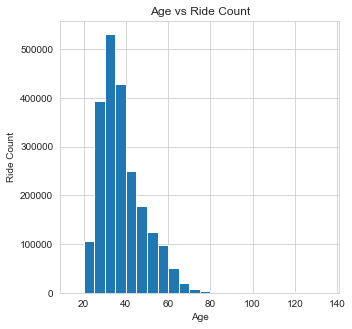

In [33]:
#figure size 
plt.figure(figsize=(5,5))

# bins width
bins = np.arange(15,df.user_age.max(),5)

#plots histogram
plt.hist(df.user_age,bins=bins);

# names x axis
plt.xlabel('Age')

#names y axis
plt.ylabel('Ride Count');

#names the title
plt.title("Age vs Ride Count");

From the above graph we can see that the histogram is right skewed which tells us that the mean age is between 20-40. 

## Are there any outliers in the age distribution?

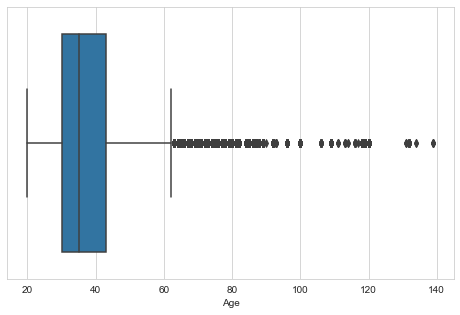

In [34]:
#figure size specs
plt.figure(figsize=(8,5))

#plots boxplot
sb.boxplot(df.user_age);

# names x axis
plt.xlabel('Age');

From the histogram, we could see the graph was right skewed but we couldn't see the outlier, but when we boxplot, we can clearly see the outlier present.

## What is the distribution for the duration of trip?

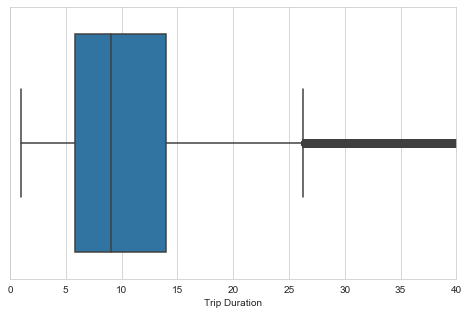

In [35]:
#figure specs
plt.figure(figsize=(8,5))

#plots boxplot
sb.boxplot(df.duration_min);

#gives x axis limit
plt.xlim(0,40)

# names x axis
plt.xlabel('Trip Duration');


From the above boxplot, we can see that the distribution is right skewed with many outlier.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Both the age and the trip duration are right skewed with age having some outlier and trip duration has many outliers. At first, the age outliers were not visible in histogram but transforming to boxplot made it possible to see it.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In order to change different variables or form new columns to get the investigation done. For example, the dataset only provided birth year for which I had to convert it to age to do the investigstion.

<a id='bivariate_exploration'></a>
## Bivariate Exploration

> In this section, I'll investigate two variables which a step ahead from univariate exploration. 

## What is the proportion of gender using the bike?

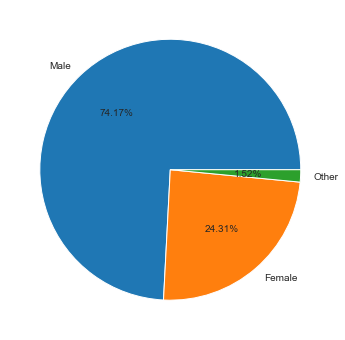

In [36]:
#look the type of users
gen = df.member_gender.value_counts()
labels = df.member_gender.value_counts().index

# figure spec
plt.figure(figsize=(6,6))

#plots pie chart
plt.pie(gen, labels=labels, autopct='%.2f%%');

From the above pie chart we can see that, 74.17% are males, 24.31% are females and 1.52% are other who use the bike.

## What is the proportion of different types of users?

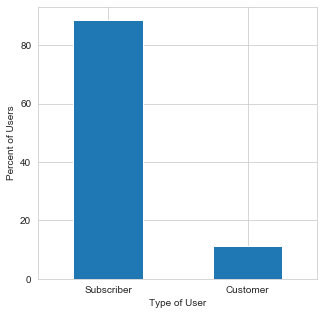

In [37]:
#look the number type of users
user = df.user_type.value_counts()
user = (df.user_type.value_counts()/df.user_type.shape[0])*100
plt.figure(figsize = (5,5))
user.plot(kind='bar')
plt.xticks(rotation=None)
plt.xlabel('Type of User');
plt.ylabel('Percent of Users');

From the above bar chart, we can see that, subscribers are around 90% and customer (non-membership users) are just around 10%.

## What is the trip duration difference between user types?

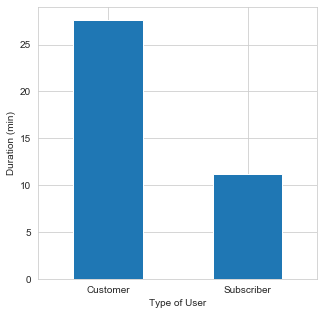

In [38]:
#trip duration
dur = df.groupby('user_type')['duration_min'].mean()

#fig spec
plt.figure(figsize=(5,5))

#plots bar
dur.plot(kind='bar')

#turns off x ticks rotations
plt.xticks(rotation=None)

#names x axis
plt.xlabel('Type of User')

#names y axis
plt.ylabel('Duration (min)');

From the above graph, we can see that even though the customer ride less bikes than subscriber their duration is more than subscribers by mean duration of around 11mins.

## In which month the bike used the most?

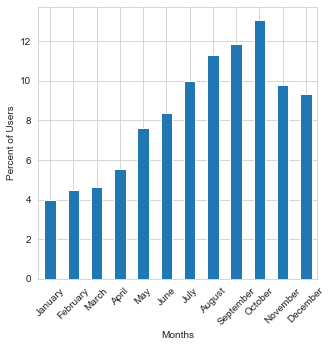

In [39]:
#most ride in which month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mon = (df.trip_month.value_counts().sort_values()/df.trip_month.shape[0])*100

#fig spec
plt.figure(figsize = (5,5))

#plots bar
mon.reindex(months).plot(kind='bar')

#gives x ticks rotations
plt.xticks(rotation=45);

#names x axis
plt.xlabel('Months')

#names y axis
plt.ylabel('Percent of Users');

From the above bar chart, we can see that in October, the bike is used the most, followed by September and August. This may be because of the perfect weather conditions during this time to bike.

## On which days the bike used the most?

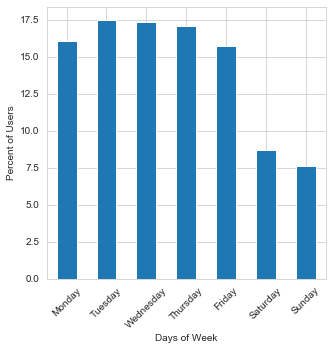

In [40]:
#which day is used
days_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = (df.trip_day.value_counts().sort_values()/df.trip_day.shape[0])*100

#fig spec
plt.figure(figsize = (5,5))

#plots bar
day.reindex(days_week).plot(kind='bar')

#gives x ticks rotations
plt.xticks(rotation=45);

#names x axis
plt.xlabel('Days of Week')

#names y axis
plt.ylabel('Percent of Users');

From the graph, we can say that the bike are most used on Tuesdays and followed by Wednesday and Thursday. This might be because people travel during the week to go work or complete different work and as the data shows, less people ride on the weekend as they tend to rest.

## Which age group bike the most?

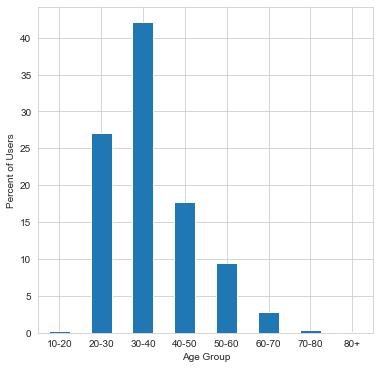

In [41]:
#which age group use the most
age_group = ['10-20','20-30','30-40','40-50', '50-60', '60-70', '70-80', '80+']
age = (df.user_age_group.value_counts()/df.user_age_group.shape[0])*100

#fig spec
plt.figure(figsize = (6,6))

#plots bar
age.reindex(age_group).plot(kind='bar')

#gives x ticks rotations
plt.xticks(rotation=0);

#names x axis
plt.xlabel('Age Group')

#names y axis
plt.ylabel('Percent of Users');

From the above chart, we can say that the age group between 30-40 use the bike the most followed by 20-30 age group.

## What time the bike used the most?

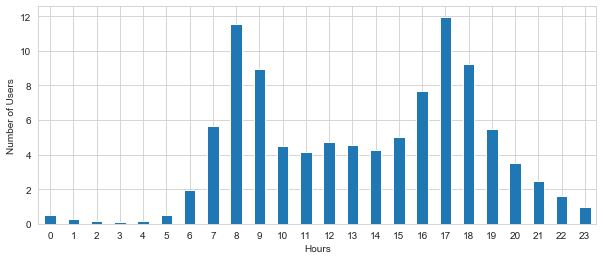

In [42]:
hour_idx = df.trip_hour.value_counts().sort_index().index
hour = (df.trip_hour.value_counts().sort_index()/df.trip_hour.shape[0])*100

#fig spec
plt.figure(figsize=(10,4))

#plots bar
hour.plot(kind='bar')

#gives x ticks rotations
plt.xticks(rotation=0)

#names x axis
plt.xlabel('Hours')

#names y axis
plt.ylabel('Number of Users');

From the graph, we can see that the bike is 08:00-09:00am and 05:00-06:00pm. This might be because it good to ride bike in the morning and evening when the sun is not directly above you. This might also suggest that, people use it for go to office as this is the office peak hours too.

##  How Age and Trip Duration affects each other?

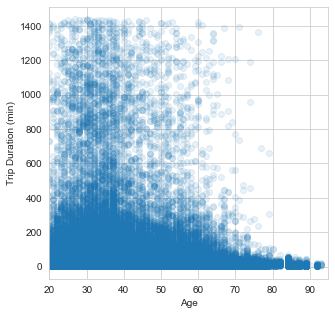

In [43]:
#fig spec
plt.figure(figsize=(5,5))

#plots scatter plot
plt.scatter(x=df.user_age, y=df.duration_min, alpha=0.1)

#gives x axis limits
plt.xlim(20, 95)

#names x axis
plt.xlabel('Age')

#names y axis
plt.ylabel('Trip Duration (min)');

From the above scatter plot, we can see that as the age increases, the mean time reduces. To make it more clear, we'll further plot pointplot with mean duration and age.

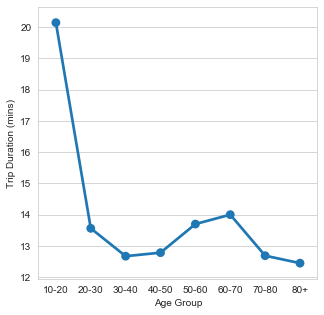

In [44]:
user_min = df.groupby('user_age_group')['duration_min'].mean().reset_index()

#fig spec
plt.figure(figsize=(5,5))

#plots pointplot
sb.pointplot(data= user_min, x='user_age_group', y='duration_min')

#names x axis
plt.xlabel('Age Group')

#names y axis
plt.ylabel('Trip Duration (mins)');

From the above graph, we can see that early age group of 10-20 have the most trip duration and it reduces at 30-40. This might suggest that, the age group of 30-40 use it for short distance travel like travelling to office. As the age group move ahead, 50-60 and 60-70 have higher duration. This suggests that people are health concious in Bay Area and they take out time to ride bike for health. This assumption may be wrong.

## How has the bike growth been over few months?

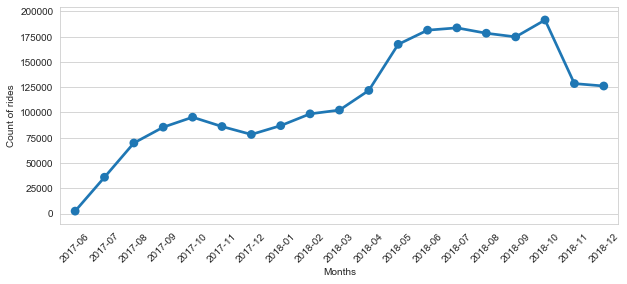

In [45]:
#ride over the year
x = df.groupby('start_time_year_month')['bike_id'].size().sort_index().index
y = df.groupby('start_time_year_month')['bike_id'].size()

#fig spec
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = df,x=x, y=y)

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Count of rides');

#gives x ticks rotations
plt.xticks(rotation=45);

From the lineplot chart, we can see that there has been an increase in the number of bike user since 2017-06 but lately there has been a sudden dip in 2018-10. I'm unsure for this reason. The company may want to look into it for find the reason for the dip and look forward to increase the bike usage.

## Which stations has the most pick-up and drop-off?

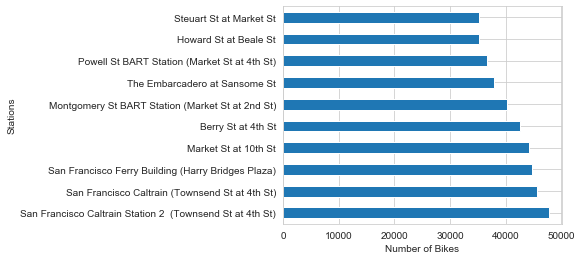

In [46]:
x = df.start_station_name.value_counts().head(10)

#fig spec
plt.figure(figsize=(5,4))

#plots bar horizontally
x.plot(kind='barh')

#names x axis
plt.xlabel('Number of Bikes')

#names y axis
plt.ylabel('Stations');

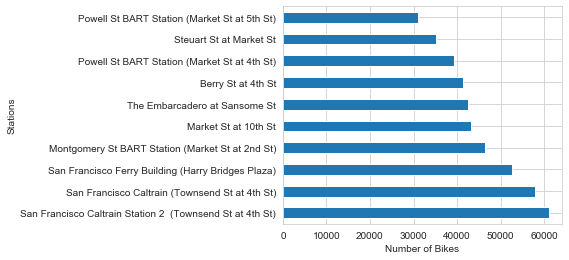

In [47]:
x = df.end_station_name.value_counts().head(10)

#fig spec
plt.figure(figsize=(5,4))

#plots bar horizontally
x.plot(kind='barh')

#names x axis
plt.xlabel('Number of Bikes')

#names y axis
plt.ylabel('Stations');

The above two graph shows 10 different stations for pick-up and drop-off. San Fransisco Caltrain Station 2 tops both the pick-up and drop-off. This suggests that it is a major hub of Bay Area where alot of people use bike.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶
The bike is used the most in the month of October, September and August. The most frequent day is Tuesday and most frequent users are male. Also, there are more subscribers than customers but the average trip duration fro customers is more than subscribers. The bike are most used in the morning 8-9 and evening 5-6 timeslot as the weather is pleasant.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is not much of relationship of frequent stations with anything, I tried to apply its relationship with customer but there is no direct relationship.

<a id='multivariate_exploration'></a>
## Multivariate Exploration

> In this section, I'll investigate more than two variables to develop multivariate plots which is a step ahead of bivariate plots.

## How has user type using bike changed over the months?

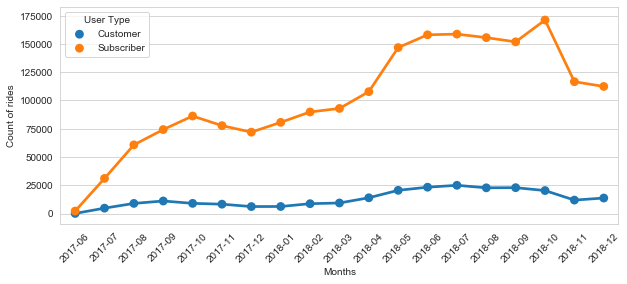

In [48]:
#month trend of user type
df_user_count = df.groupby(['start_time_year_month','user_type']).size().reset_index()

#fig spec
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = df_user_count ,x='start_time_year_month', y=0,hue='user_type')

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Count of rides');

#gives x ticks rotations
plt.xticks(rotation=45);

#gives titles to legend and location
plt.legend(title='User Type');

From the above lineplot, we can see that there has been a very signifant increase in the number of subscribers using the bike which suggests that many people might have transformed from customer to subscriber. There is not much of a increase in customer (without membership).

## What is the relation between duration of trip and between two user types?

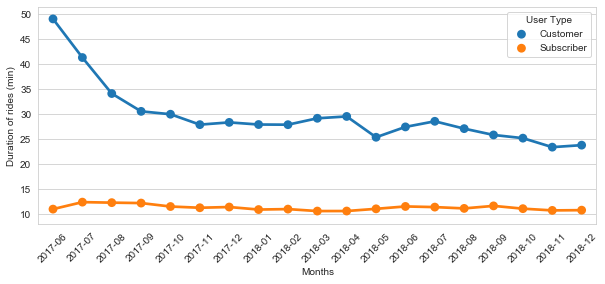

In [49]:
#duration in min of user type
df_duration_min = df.groupby(['start_time_year_month','user_type'])['duration_min'].mean().reset_index()

#fig spec
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = df_duration_min ,x='start_time_year_month', y='duration_min',hue='user_type')

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Duration of rides (min)');

#gives x ticks rotations
plt.xticks(rotation=45);

#gives titles to legend and location
plt.legend(title='User Type');

The above graph suggest that, the mean duration of trip is more for customer without membership and the time duration is showing a downtrend for the customer but there has not much of a change in trend of subscribers but it is significantly less than customers.

## What is the relation between age groups and number of bike rides over the months?

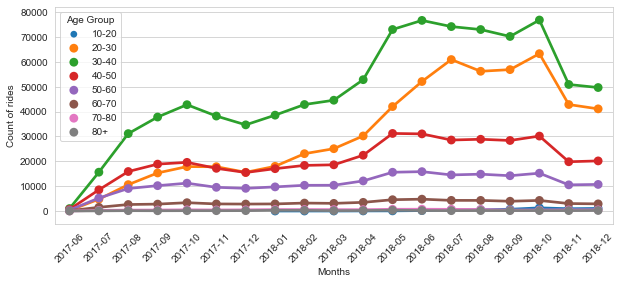

In [50]:
#monthly trend of age group
df_age_group = df.groupby(['start_time_year_month','user_age_group'])['bike_id'].count().reset_index()
h = df_age_group.user_age_group.sort_values()

#fig spec
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = df_age_group, x ='start_time_year_month' , y='bike_id', hue=h)

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Count of rides');

#gives x ticks rotations
plt.xticks(rotation=45);

#gives titles to legend and location
plt.legend(title='Age Group');

The above graph suggests that, the age group 30-40 and 20-30 has grown the most over the months. Other age group shows growth but its is not significant as the 30-40 and 20-30.

## What is the relation between gender and number of bike rides over the months?

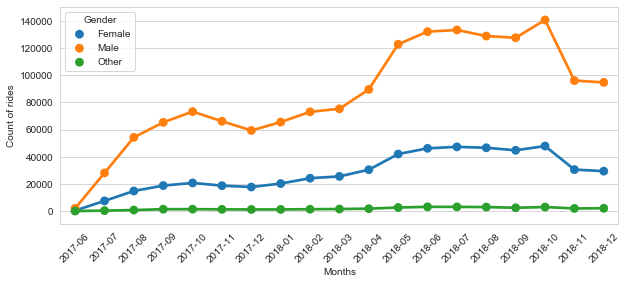

In [51]:
#count by gender
gen_count = df.groupby(['start_time_year_month','member_gender'])['bike_id'].size().reset_index()

#fig spec
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = gen_count, x ='start_time_year_month' , y='bike_id', hue="member_gender")

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Count of rides');

#gives x ticks rotations
plt.xticks(rotation=45);

#gives titles to legend and location
plt.legend(title='Gender');

The above lineplot suggests that, there has been a drastic increase in the male users while the female users stays low but it has increased too over the months.

## What is the relationship between gender and trip duration?

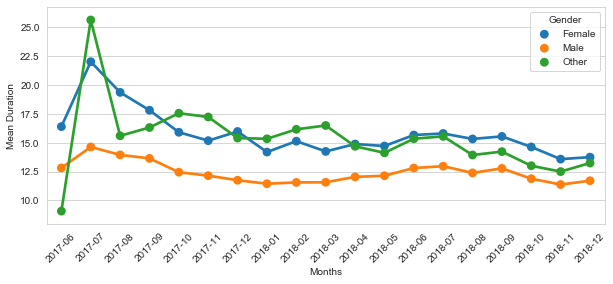

In [52]:
#duration by gender
gen_dur = df.groupby(['start_time_year_month','member_gender'])['duration_min'].mean().reset_index()

#plots pointplot
plt.figure(figsize=(10,4))

#plots pointplot
sb.pointplot(data = gen_dur, x ='start_time_year_month' , y='duration_min', hue="member_gender")

#names x axis
plt.xlabel('Months');

#names y axis
plt.ylabel('Mean Duration');

#gives x ticks rotations
plt.xticks(rotation=45);

#gives titles to legend and location
plt.legend(title='Gender',bbox_to_anchor=(1,1));

The above graph suggests that there has been a reduction in the trip duration over the months, but the male riders trip duration is low with females and others have around the same trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There has been an uptrend in the subscribers with not much increase in customers. The age group of 30-40 has increased the most followed by 20-30. The male users have increased over the years as compared to females and the average trip duration of females is more than average trip duration of men.

### Were there any interesting or surprising interactions between features?

This exploration helped in finding that women average duration time is more than any other gender and also the customers average trip duration is more than subscribers average trip duration. This suggest that the subscribers are less active than customers.

In [53]:
df.to_csv('clean_merged_data.csv', index = False)